In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Overfitting

In this notebook, we will be getting a neural network to overfit on some dataset to obtain the plots of the loss curves used in Chapter 5.

### Loss Curve Example

Overfitting a simple CNN on the MNIST dataset and plotting the resulting loss curves

In [465]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [466]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [468]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [491]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input

input_layer = Input(shape=(28,28, 1))
layer1 = Conv2D(kernel_size=3, filters=32, strides=2, activation='relu')(input_layer)
layer2 = Conv2D(kernel_size=3, filters=16, strides=2, activation='relu')(layer1)
layer3 = Conv2D(kernel_size=3, filters=8, strides=2, activation='relu')(layer2)
flat = Flatten()(layer3)
output_layer = Dense(10, activation='softmax')(flat)

model = Model(input_layer, output_layer)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_59 (Conv2D)          (None, 13, 13, 32)        320       
                                                                 
 conv2d_60 (Conv2D)          (None, 6, 6, 16)          4624      
                                                                 
 conv2d_61 (Conv2D)          (None, 2, 2, 8)           1160      
                                                                 
 flatten_19 (Flatten)        (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 6,434
Trainable params: 6,434
Non-trainable p

In [492]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [493]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_val, y_val), epochs=64)

Epoch 1/64
300/300 [==============================] - 2s 5ms/step - loss: 2.0196 - accuracy: 0.4180 - val_loss: 0.8400 - val_accuracy: 0.7389
Epoch 2/64
300/300 [==============================] - 1s 5ms/step - loss: 0.5535 - accuracy: 0.8339 - val_loss: 0.4095 - val_accuracy: 0.8799
Epoch 3/64
300/300 [==============================] - 1s 4ms/step - loss: 0.3432 - accuracy: 0.8984 - val_loss: 0.2957 - val_accuracy: 0.9120
Epoch 4/64
300/300 [==============================] - 1s 4ms/step - loss: 0.2565 - accuracy: 0.9237 - val_loss: 0.2319 - val_accuracy: 0.9306
Epoch 5/64
300/300 [==============================] - 1s 4ms/step - loss: 0.2013 - accuracy: 0.9405 - val_loss: 0.2090 - val_accuracy: 0.9422
Epoch 6/64
300/300 [==============================] - 1s 4ms/step - loss: 0.1730 - accuracy: 0.9486 - val_loss: 0.1854 - val_accuracy: 0.9466
Epoch 7/64
300/300 [==============================] - 1s 4ms/step - loss: 0.1510 - accuracy: 0.9547 - val_loss: 0.1915 - val_accuracy: 0.9424
Epoch 

In [494]:
history_dict = history.history

Plotting the loss curve using the training history. It is easy to see the point where we have begun to overfit.

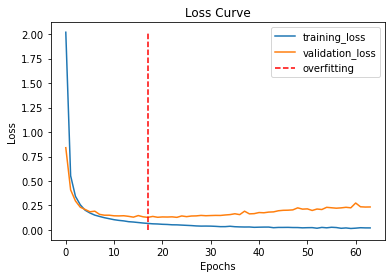

In [495]:
plt.title("Loss Curve")

plt.plot(history_dict['loss'], label='training_loss')
plt.plot(history_dict['val_loss'], label='validation_loss')

plt.vlines(np.argmin(history_dict['val_loss']), 0, np.max(history_dict['loss']),
           label = 'overfitting', linestyles='dashed', color='red')

plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


In [496]:
print("Overfitting Boundary Epoch:", np.argmin(history_dict['val_loss']))

Overfitting Boundary Epoch: 17


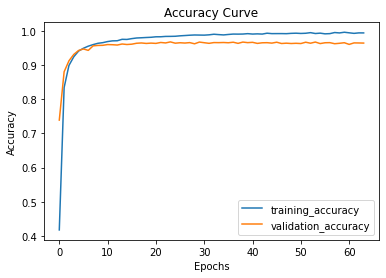

In [497]:
plt.title("Accuracy Curve")

plt.plot(history_dict['accuracy'], label='training_accuracy')
plt.plot(history_dict['val_accuracy'], label='validation_accuracy')

plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()


In [481]:
test_results = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1885 - accuracy: 0.9724


In [482]:
test_results

[0.18848606944084167, 0.9724000096321106]